# 0 Utils

## 0.1 Imports and paths

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter

data_folder = f'/home/janko/Desktop/social-dining/data'

pre_study_questionnaire_file = f'{data_folder}/questionnaires/Pre-StudyQuestionnaire.csv'
post_study_questionnaire_file = f'{data_folder}/questionnaires/Post-StudyQuestionnaire.csv'


## 0.2 Plotting

In [2]:
def get_colors_list(n):
    return list(mcolors.TABLEAU_COLORS.keys())[:n]


## 0.3 Statistics

In [3]:
def print_array_stats(arr, label):
    print(f"{label}:\n \t Min: {np.min(arr)} \t Max: {np.max(arr)} \t Mean: {np.mean(arr)} \t Std: {np.std(arr)} \t Median: {np.median(arr)}")

def print_item_counts(items, label):
    total_count = sum([v for _, v in items])
    print(f'{label}:')
    for k, v in items:
        print(f'\t{k}: {v} ({100 * v / total_count:.2f}%)')


# 1 Pre-study questionnaire

In [4]:
pre_df = pd.read_csv(pre_study_questionnaire_file)


## 1.1 Data validation

In [5]:
assert all(pre_df['Progress'][2:] == '100')
assert all(pre_df['Finished'][2:] == 'True')
for i in range(30):
    for j in range(3):
        # Session ID
        assert pre_df['I2'][i * 3 + j + 2] == f'{i + 1:02d}', f"{pre_df['I2'][i * 3 + j + 2]} != {i + 1:02d}"
    # Participant position
    assert set(pre_df['I3'][i * 3 + 2 : i * 3 + 5]) == {'1', '2', '3'}, f"{set(pre_df['I3'][i * 3 + 2 : i * 3 + 5])} != {{'1', '2', '3'}}"


## 1.2 Meal time
Time when the meal was eaten (i.e. when the experiment was performed).

Meal time (when the meal started):
 	 Min: 9 	 Max: 20 	 Mean: 16.166666666666668 	 Std: 3.2360813064912666 	 Median: 17.5


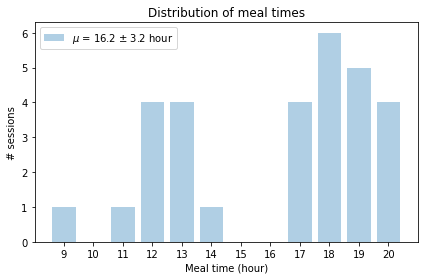

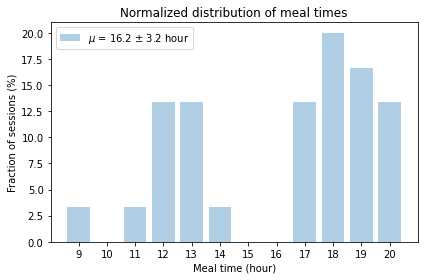

Meal times:
	Breakfast: 1 (3.33%)
	Lunch: 10 (33.33%)
	Dinner: 19 (63.33%)


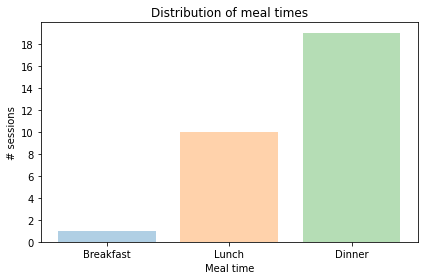

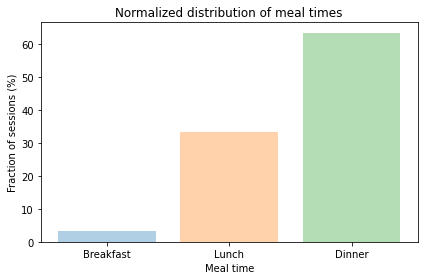

In [6]:
# Shift by two hours because the times (when the pre-study questionnaire was filled in) were automatically collected in the MDT time zone
meal_times = [ t.hour + 2 + (1 if t.minute > 30 else 0) for t in pd.to_datetime(pre_df['EndDate'][2:]) ]
for i in range(len(meal_times) // 3):
    # Check the meal times recorded for participants within one session agree
    assert len(set(meal_times[i * 3 : i * 3 + 3])) == 1, f'{i}: {meal_times[i * 3 : i * 3 + 3]}'
meal_times = meal_times[::3]
print_array_stats(meal_times, 'Meal time (when the meal started)')

plt.figure()
time_range = np.arange(min(meal_times), max(meal_times) + 2)
plt.bar(time_range[:-1], np.histogram(meal_times, bins=time_range)[0], alpha=0.35, label=fr'$\mu$ = {np.mean(meal_times):.1f} $\pm$ {np.std(meal_times):.1f} hour')
plt.legend()
plt.xticks(time_range[:-1], time_range[:-1])
plt.xlabel('Meal time (hour)')
plt.ylabel('# sessions')
plt.title("Distribution of meal times")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(time_range[:-1], np.histogram(meal_times, bins=time_range)[0] * 100 / 30, alpha=0.35, label=fr'$\mu$ = {np.mean(meal_times):.1f} $\pm$ {np.std(meal_times):.1f} hour')
plt.legend()
plt.xticks(time_range[:-1], time_range[:-1])
plt.xlabel('Meal time (hour)')
plt.ylabel('Fraction of sessions (%)')
plt.title("Normalized distribution of meal times")
plt.tight_layout()
plt.show()

# Categorize into breakfast, lunch, and dinner times
categorized_meal_times = dict(zip(['Breakfast', 'Lunch', 'Dinner'], np.histogram(meal_times, bins=[8, 10.5, 16, 21])[0]))
print_item_counts(categorized_meal_times.items(), 'Meal times')
plt.figure()
plt.bar(categorized_meal_times.keys(), categorized_meal_times.values(), alpha=0.35, color=get_colors_list(len(categorized_meal_times)))
plt.xlabel('Meal time')
plt.yticks(range(max(categorized_meal_times.values()) + 1)[::2])
plt.ylabel('# sessions')
plt.title("Distribution of meal times")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(categorized_meal_times.keys(), np.array(list(categorized_meal_times.values())) * 100 / 30, alpha=0.35, color=get_colors_list(len(categorized_meal_times)))
plt.xlabel('Meal time')
plt.ylabel('Fraction of sessions (%)')
plt.title("Normalized distribution of meal times")
plt.tight_layout()
plt.show()


## 1.3 Demographics

### 1.3.1 Age

Age:
 	 Min: 18 	 Max: 38 	 Mean: 21.844444444444445 	 Std: 3.4477403585895083 	 Median: 21.0


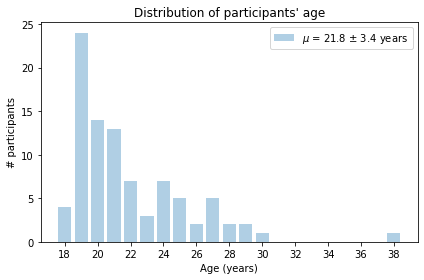

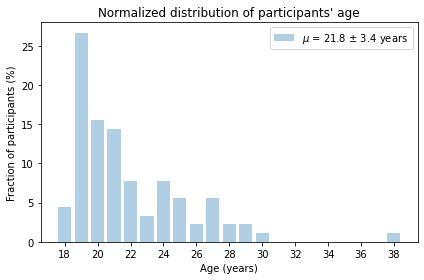

In [7]:
age = pd.to_numeric(pre_df['D1'][2:])
print_array_stats(age, 'Age')

plt.figure()
age_range = np.arange(min(age), max(age) + 2)
plt.bar(age_range[:-1], np.histogram(age, bins=age_range)[0], alpha=0.35, label=fr'$\mu$ = {np.mean(age):.1f} $\pm$ {np.std(age):.1f} years')
plt.legend()
plt.xticks(age_range[::2])
plt.xlabel('Age (years)')
plt.ylabel('# participants')
plt.title("Distribution of participants' age")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(age_range[:-1], np.histogram(age, bins=age_range)[0] * 100 / 90, alpha=0.35, label=fr'$\mu$ = {np.mean(age):.1f} $\pm$ {np.std(age):.1f} years')
plt.legend()
plt.xticks(age_range[::2])
plt.xlabel('Age (years)')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' age")
plt.tight_layout()
plt.show()


### 1.3.2 Gender

Gender:
	Female: 56 (62.22%)
	Male: 34 (37.78%)


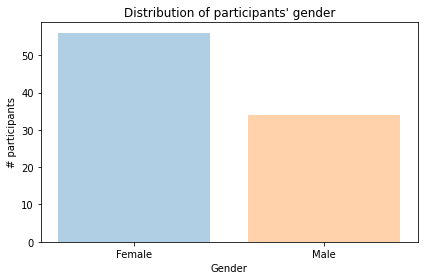

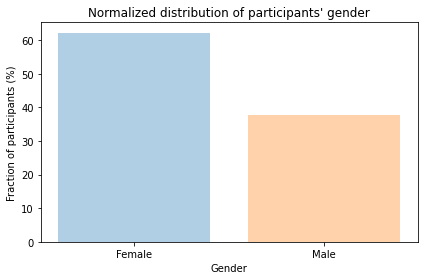

In [8]:
genders = Counter(pre_df['D2'][2:])
print_item_counts(genders.items(), 'Gender')

plt.figure()
plt.bar(genders.keys(), genders.values(), alpha=0.35, color=get_colors_list(len(genders)))
plt.xlabel('Gender')
plt.ylabel('# participants')
plt.title("Distribution of participants' gender")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(genders.keys(), np.array(list(genders.values())) * 100 / 90, alpha=0.35, color=get_colors_list(len(genders)))
plt.xlabel('Gender')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' gender")
plt.tight_layout()
plt.show()


### 1.3.3 Race

Race:
	White: 39 (43.33%)
	Asian: 39 (43.33%)
	Black or African American: 3 (3.33%)
	Other or two/more races: 9 (10.00%)
		 White and Asian
		 Asian / Latino
		 white/Latino
		 Asian and white
		 Latinx
		 Latino
		 Asian/White
		 White and Hispanic
		 White/Latino


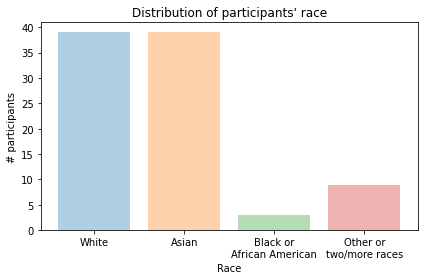

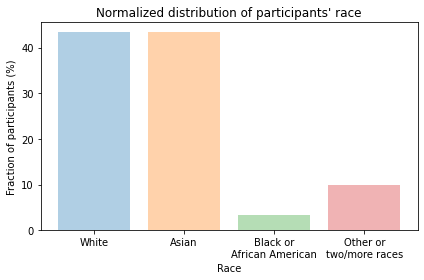

In [21]:
races_counter = Counter(pre_df['D3'][2:])
print_item_counts(races_counter.items(), 'Race')

# Show details for 'Other or two/more races'
for i, race in enumerate(pre_df[f'D3'][2:]):
    if race == 'Other or two/more races':
        print(f"\t\t {pre_df[f'D3_6_TEXT'][2 + i]}")

races_labels = [
    'White',
    'Asian',
    'Black or\nAfrican American',
    'Other or\ntwo/more races'
]
races_range = np.arange(len(races_counter))
races_values = races_counter.values()
plt.figure()
plt.bar(races_range, races_values, alpha=0.35, color=get_colors_list(len(races_counter)))
plt.xticks(races_range, races_labels)
plt.xlabel('Race')
plt.ylabel('# participants')
plt.title("Distribution of participants' race")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(races_range, np.array(list(races_values)) * 100 / 90, alpha=0.35, color=get_colors_list(len(races_counter)))
plt.xticks(races_range, races_labels)
plt.xlabel('Race')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' race")
plt.tight_layout()
plt.show()


Race:
	White: 39 (43.33%)
	Asian: 39 (43.33%)
	Black or African American: 3 (3.33%)
	White-Asian: 3 (3.33%)
	White-Hispanic: 3 (3.33%)
	Hispanic: 2 (2.22%)
	Asian-Hispanic: 1 (1.11%)


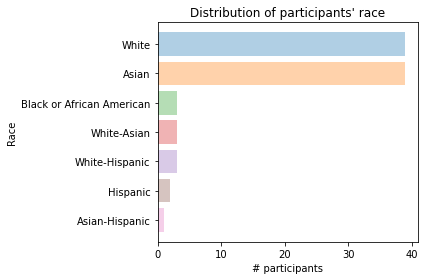

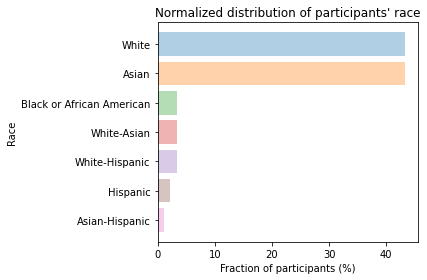

In [26]:
# If you want to further categorize the responses to 'Other or two/more races' into Hispanic, White-Asian, Asian-Hispanic, White-Hispanic
# then make the following changes to the Pre-StudyQuestionnaire.csv file and run this cell
# 02_2    White and Asian       => White-Asian
# 05_3    Asian / Latino        => Asian-Hispanic
# 09_1    white/Latino          => White-Hispanic
# 09_2    Asian and white       => White-Asian
# 15_1    Latinx                => Hispanic
# 15_3    Latino                => Hispanic
# 19_1    Asian/White           => White-Asian
# 21_3    White and Hispanic    => White-Hispanic
# 23_2    White/Latino          => White-Hispanic

races = []
for i, race in enumerate(pre_df['D3'][2:]):
    if race == 'Other or two/more races':
        races.append(pre_df['D3_6_TEXT'][2 + i])
    else:
        races.append(race)

races = Counter(races).most_common()
print_item_counts(races, 'Race')

keys, values = zip(*races[::-1])
plt.figure()
plt.barh(keys, values, alpha=0.35, color=get_colors_list(len(races))[::-1])
plt.ylabel('Race')
plt.xlabel('# participants')
plt.title("Distribution of participants' race")
plt.tight_layout()
plt.show()

plt.figure()
plt.barh(keys, np.array(values) * 100 / 90, alpha=0.35, color=get_colors_list(len(races))[::-1])
plt.ylabel('Race')
plt.xlabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' race")
plt.tight_layout()
plt.show()


### 1.3.4 Dominant hand

Dominant hand:
	Right: 82 (91.11%)
	Left: 8 (8.89%)


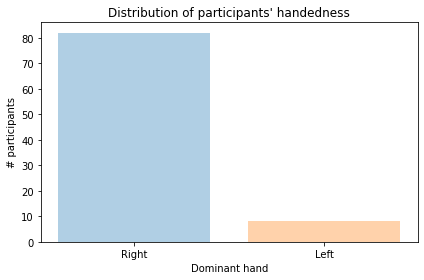

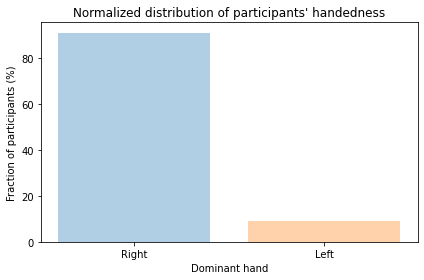

In [22]:
handedness = Counter(pre_df['D4'][2:])
print_item_counts(handedness.items(), 'Dominant hand')

plt.figure()
plt.bar(handedness.keys(), handedness.values(), alpha=0.35, color=get_colors_list(len(handedness)))
plt.xlabel('Dominant hand')
plt.ylabel('# participants')
plt.title("Distribution of participants' handedness")
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(handedness.keys(), np.array(list(handedness.values())) * 100 / 90, alpha=0.35, color=get_colors_list(len(handedness)))
plt.xlabel('Dominant hand')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' handedness")
plt.tight_layout()
plt.show()


## 1.4 Relationship to co-diners

Each of 90 participants assessed their relationship with their 2 co-diners => 180 one-directional assessments<br>
In fact, they might not mutually agree.

### 1.4.1 Relationship type

Relationship type:
	Friend: 155 (86.11%)
	Partner: 12 (6.67%)
	Professional (co-worker/classmate): 10 (5.56%)
	Other, please specify: 3 (1.67%)
		 Acquaintance
		 boyfriend
		 Acquaintance


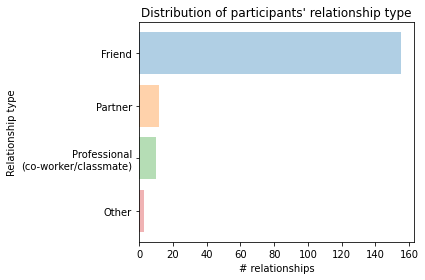

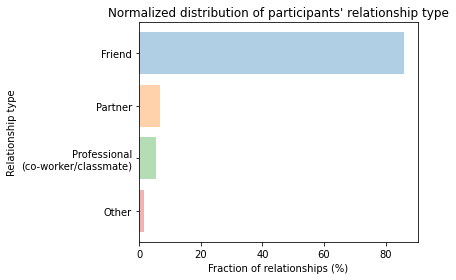

In [23]:
relationship_types = (Counter(pre_df['L1'][2:]) + Counter(pre_df['R1'][2:])).most_common()[::-1]
print_item_counts(relationship_types[::-1], 'Relationship type')

for position in ['L', 'R']:
    for i, relationship in enumerate(pre_df[f'{position}1'][2:]):
        if relationship == 'Other, please specify':
            print(f"\t\t {pre_df[f'{position}1_4_TEXT'][2 + i]}")

plt.figure()
plt.barh([f'{k.split(" ")[0]}\n{k.split(" ")[1]}' if len(k) > 22 else k.split(',')[0] for k, _ in relationship_types], [v for _, v in relationship_types], alpha=0.35, color=get_colors_list(len(relationship_types))[::-1])
plt.ylabel('Relationship type')
plt.xlabel('# relationships')
plt.title("Distribution of participants' relationship type")
plt.tight_layout()
plt.show()

plt.figure()
plt.barh([f'{k.split(" ")[0]}\n{k.split(" ")[1]}' if len(k) > 22 else k.split(',')[0] for k, _ in relationship_types], 
         np.array([v for _, v in relationship_types]) * 100 / 180, alpha=0.35, color=get_colors_list(len(relationship_types))[::-1])
plt.ylabel('Relationship type')
plt.xlabel('Fraction of relationships (%)')
plt.title("Normalized distribution of participants' relationship type")
plt.tight_layout()
plt.show()


### 1.4.2 Relationship duration

Relationship duration:
	1 month - 1 year: 90 (50.00%)
	1 year - 2 years: 49 (27.22%)
	2 years - 5 years: 37 (20.56%)
	More than 5 years: 4 (2.22%)


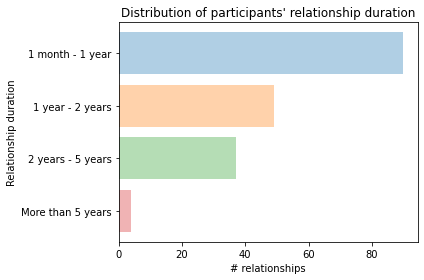

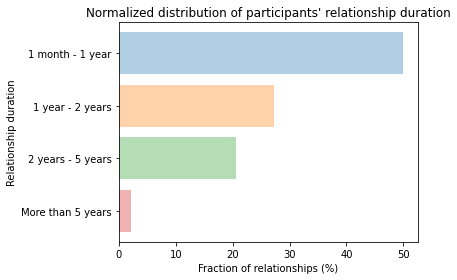

In [24]:
relationship_durations = Counter(pre_df['L2'][2:]) + Counter(pre_df['R2'][2:])
relationship_durations = sorted(relationship_durations.items())
print_item_counts(relationship_durations, 'Relationship duration')

keys, values = zip(*relationship_durations[::-1])
plt.figure()
plt.barh(keys, values, alpha=0.35, color=get_colors_list(len(relationship_durations))[::-1])
plt.ylabel('Relationship duration')
plt.xlabel('# relationships')
plt.title("Distribution of participants' relationship duration")
plt.tight_layout()
plt.show()

keys, values = zip(*relationship_durations[::-1])
plt.figure()
plt.barh(keys, np.array(values) * 100 / 180, alpha=0.35, color=get_colors_list(len(relationship_durations))[::-1])
plt.ylabel('Relationship duration')
plt.xlabel('Fraction of relationships (%)')
plt.title("Normalized distribution of participants' relationship duration")
plt.tight_layout()
plt.show()


### 1.4.3 Frequency of eating together

Frequency of eating together:
	Several times a day: 9 (5.00%)
	Almost every day: 24 (13.33%)
	Few times a week: 39 (21.67%)
	Few times a month: 59 (32.78%)
	Few times a year: 41 (22.78%)
	Never
(this is the first time): 8 (4.44%)


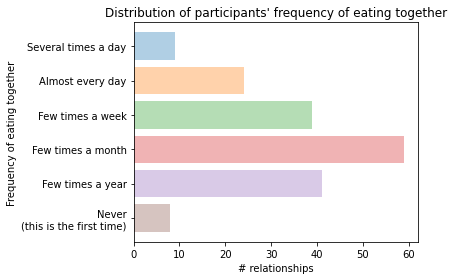

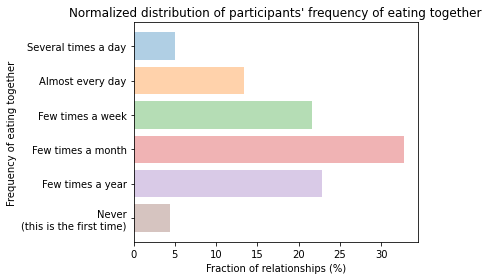

In [25]:
# Frequency of eating together (i.e. commensality frequency)
eating_together_freq = Counter(pre_df['L3'][2:]) + Counter(pre_df['R3'][2:])
eating_together_freq = dict(sorted(eating_together_freq.items()))

# Shorten the longest key and impose key order
eating_together_freq['Never\n(this is the first time)'] = eating_together_freq['Never (this is the first time we are eating together)']
del eating_together_freq['Never (this is the first time we are eating together)']
eating_together_freq = { key : eating_together_freq[key] for key in ['Never\n(this is the first time)', 'Few times a year', 'Few times a month', 'Few times a week', 'Almost every day', 'Several times a day'] }
print_item_counts(list(eating_together_freq.items())[::-1], 'Frequency of eating together')

plt.figure()
plt.barh(list(eating_together_freq.keys()), eating_together_freq.values(), alpha=0.35, color=get_colors_list(len(eating_together_freq))[::-1])
plt.ylabel('Frequency of eating together')
plt.xlabel('# relationships')
plt.title("Distribution of participants' frequency of eating together")
plt.tight_layout()
plt.show()

plt.figure()
plt.barh(list(eating_together_freq.keys()), np.array(list(eating_together_freq.values())) * 100 / 180, alpha=0.35, color=get_colors_list(len(eating_together_freq))[::-1])
plt.ylabel('Frequency of eating together')
plt.xlabel('Fraction of relationships (%)')
plt.title("Normalized distribution of participants' frequency of eating together")
plt.tight_layout()
plt.show()


## 1.5 Social dining habits

### 1.5.1 Co-diner type

Co-diner type:
Breakfast:
	Alone: 69 (76.67%)
	Random people: 1 (1.11%)
	Co-workers: 0 (0.00%)
	Friends/roommates: 9 (10.00%)
	Family: 1 (1.11%)
	Other: 10 (11.11%)
		 partner
		 roommates, or I skip breakfast
		 I don't really eat breakfast
		 I don't eat breakfast usually
		 Don't eat breakfast
		 dont eat breakfast
		 Skip breakfast
		 nan
		 don't eat
		 Sleep in
Lunch:
	Alone: 17 (18.89%)
	Random people: 3 (3.33%)
	Co-workers: 11 (12.22%)
	Friends/roommates: 58 (64.44%)
	Family: 1 (1.11%)
	Other: 0 (0.00%)
Dinner:
	Alone: 16 (17.78%)
	Random people: 0 (0.00%)
	Co-workers: 0 (0.00%)
	Friends/roommates: 72 (80.00%)
	Family: 1 (1.11%)
	Other: 1 (1.11%)
		 partner


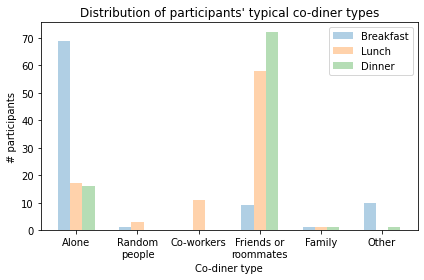

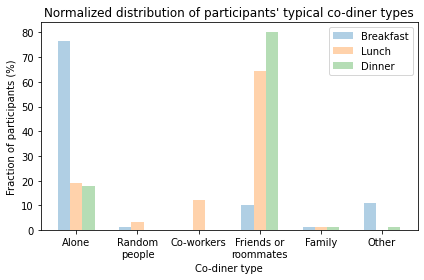

In [26]:
meal_types = ['Breakfast', 'Lunch', 'Dinner']
codiner_types = ['Alone', 'Random people', 'Co-workers', 'Friends/roommates', 'Family', 'Other, please specify']
codiner_types_labels = ['Alone', 'Random\npeople', 'Co-workers', 'Friends or\nroommates', 'Family', 'Other']
keys_range = np.arange(len(codiner_types))
ys = []
print('Co-diner type:')
plt.figure()
for i, meal_type in enumerate(meal_types):
    codiner_counter = Counter(pre_df[f'S1_{i + 1}'][2:])
    # For the remaining types, impose key order and add zero counts
    codiner_counter_sorted = { codiner_type: 0 if codiner_type not in codiner_counter else codiner_counter[codiner_type] for codiner_type in codiner_types }
    # Rename the key for 'Other' co-diner types
    codiner_counter_sorted['Other'] = codiner_counter['Other, please specify']
    del codiner_counter_sorted['Other, please specify']
    print_item_counts(list(codiner_counter_sorted.items()), meal_type)

    # Show details of 'Other' co-diner types
    for j, codiner_type in enumerate(pre_df[f'S1_{i + 1}'][2:]):
        if codiner_type == 'Other, please specify':
            print(f"\t\t {pre_df[f'S1_{i + 1}_6_TEXT'][2 + j]}")

    y = codiner_counter_sorted.values()
    ys.append(np.array(list(y)))
    plt.bar(keys_range + 0.2 * (i - 1), y, alpha=0.35, width=0.2, label=meal_type)
plt.xticks(keys_range, codiner_types_labels)
plt.xlabel('Co-diner type')
plt.ylabel('# participants')
plt.title("Distribution of participants' typical co-diner types")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
for i, meal_type in enumerate(meal_types):
    plt.bar(keys_range + 0.2 * (i - 1), ys[i] * 100 / 90, alpha=0.35, width=0.2, label=meal_type)
plt.xticks(keys_range, codiner_types_labels)
plt.xlabel('Co-diner type')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' typical co-diner types")
plt.legend()
plt.tight_layout()
plt.show()


### 1.5.2 Social dining frequency

Social dining frequency:
Breakfast:
 	 Min: 0 	 Max: 7 	 Mean: 1.3888888888888888 	 Std: 1.823881358498009 	 Median: 1.0
Lunch:
 	 Min: 0 	 Max: 7 	 Mean: 3.966666666666667 	 Std: 1.7916472867168918 	 Median: 4.0
Dinner:
 	 Min: 0 	 Max: 7 	 Mean: 4.477777777777778 	 Std: 1.9845390048392586 	 Median: 5.0


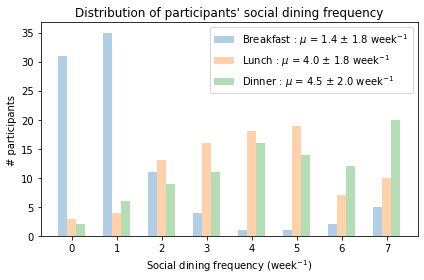

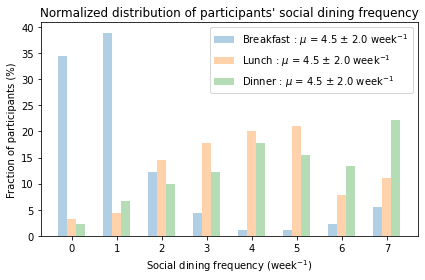

In [27]:
meal_types = ['Breakfast', 'Lunch', 'Dinner']
freq_range = np.arange(9)
print('Social dining frequency:')
ys = []
plt.figure()
for i, meal_type in enumerate(meal_types):
    sd_freq = pd.to_numeric(pre_df[f'S2_{i + 1}'][2:])
    print_array_stats(sd_freq, meal_type)
    y = np.histogram(sd_freq, bins=freq_range)[0]
    ys.append(y)
    plt.bar(freq_range[:-1] + 0.2 * (i - 1), y, alpha=0.35, width=0.2, label=fr'{meal_type} : $\mu$ = {np.mean(sd_freq):.1f} $\pm$ {np.std(sd_freq):.1f} week$^{{-1}}$')
plt.legend()
plt.xlabel(fr'Social dining frequency (week$^{{-1}}$)')
plt.ylabel('# participants')
plt.title("Distribution of participants' social dining frequency")
plt.tight_layout()
plt.show()

plt.figure()
for i, meal_type in enumerate(meal_types):
    plt.bar(freq_range[:-1] + 0.2 * (i - 1), ys[i] * 100 / 90, alpha=0.35, width=0.2, label=fr'{meal_type} : $\mu$ = {np.mean(sd_freq):.1f} $\pm$ {np.std(sd_freq):.1f} week$^{{-1}}$')
plt.legend()
plt.xlabel(fr'Social dining frequency (week$^{{-1}}$)')
plt.ylabel('Fraction of participants (%)')
plt.title("Normalized distribution of participants' social dining frequency")
plt.tight_layout()
plt.show()


### 1.5.3 Dining location

Dining location:
Breakfast:
	At home: 75 (83.33%)
	At restaurant: 2 (2.22%)
	At work: 3 (3.33%)
	Other: 10 (11.11%)
		 I don't eat breakfast
		 on campus
		 dining hall
		 While walking to class
		 don't eat breakfast
		 i dont eat breakfast
		 Dining Hall
		 nan
		 don't eat
		 Sleep in
Lunch:
	At home: 14 (15.56%)
	At restaurant: 14 (15.56%)
	At work: 38 (42.22%)
	Other: 24 (26.67%)
		 School
		 On campus
		 Campus
		 Campus Cafe
		 on campus
		 Dining hall
		 dining hall
		 dining hall
		 Dining Hall
		 Fairly uniform 3 way split
		 School
		 school
		 on Campus 
		 On campus
		 on campus
		 on campus
		 School
		 at school
		 school
		 Dining hall
		 Dining Hall
		 school
		 dining hall
		 Dining Hall
Dinner:
	At home: 60 (66.67%)
	At restaurant: 16 (17.78%)
	At work: 3 (3.33%)
	Other: 11 (12.22%)
		 Dining Hall, Campus
		 friend house
		 Dining Hall
		 school cafeteria
		 friends' place
		 dining hall
		 home/restaurant 60/30
		 Dining hall
		 Dining Hall
		 dining hall
		 Dining 

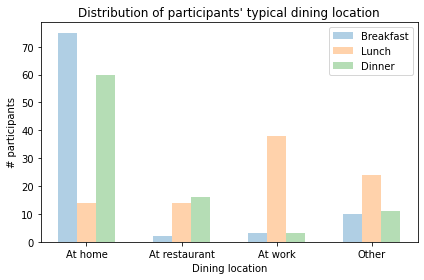

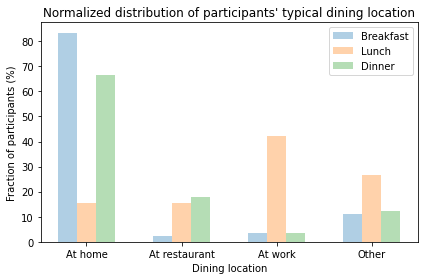

In [28]:
meal_types = ['Breakfast', 'Lunch', 'Dinner']
keys_range = np.arange(4)
locations = ['At home', 'At restaurant', 'At work', 'Other']
print('Dining location:')
ys = []
plt.figure()
for i, meal_type in enumerate(meal_types):
    dining_loc_counter = Counter(pre_df[f'S3_{i + 1}'][2:])
    # Rename the key for 'Other' dining locations
    dining_loc_counter['Other'] = dining_loc_counter['Other, please specify']
    del dining_loc_counter['Other, please specify']
    dining_loc = sorted(dining_loc_counter.items())
    print_item_counts(dining_loc, meal_type)

    # Show details of 'Other' co-diner types
    for j, codiner_type in enumerate(pre_df[f'S3_{i + 1}'][2:]):
        if codiner_type == 'Other, please specify':
            print(f"\t\t {pre_df[f'S3_{i + 1}_4_TEXT'][2 + j]}")

    y = [v for _, v in dining_loc]
    ys.append(np.array(y))
    plt.bar(keys_range + 0.2 * (i - 1), y, width=0.2, alpha=0.35, label=meal_type)
plt.xticks(keys_range, locations)
plt.xlabel('Dining location')
plt.ylabel('# participants')
plt.legend()
plt.title("Distribution of participants' typical dining location")
plt.tight_layout()
plt.show()

plt.figure()
for i, meal_type in enumerate(meal_types):
    plt.bar(keys_range + 0.2 * (i - 1), ys[i] * 100 / 90, width=0.2, alpha=0.35, label=meal_type)
plt.xticks(keys_range, locations)
plt.xlabel('Dining location')
plt.ylabel('Fraction of participants (%)')
plt.legend()
plt.title("Normalized distribution of participants' typical dining location")
plt.tight_layout()
plt.show()


# 2 Post-study questionnaire

In [29]:
post_df = pd.read_csv(post_study_questionnaire_file)


## 2.1 Data validation

In [30]:
assert all(post_df['Progress'][2:] == '100')
assert all(post_df['Finished'][2:] == 'True')
for i in range(30):
    for j in range(3):
        # Session ID
        assert post_df['I1'][i * 3 + j + 2] == f'{i + 1:02d}', f"{post_df['I1'][i * 3 + j + 2]} != {i + 1:02d}"
    # Participant position
    assert set(post_df['I2'][i * 3 + 2 : i * 3 + 5]) == {'1', '2', '3'}, f"{set(post_df['I2'][i * 3 + 2 : i * 3 + 5])} != {{'1', '2', '3'}}"


## 2.1 Dining experience

### 2.1.1 Ratings

Dining experience ratings:
My overall experience of the meal was great:
	1  Strongly disagree: 2 (2.22%)
	2  Disagree: 0 (0.00%)
	3  Somewhat disagree: 0 (0.00%)
	4  Neither agree or disagree: 2 (2.22%)
	5  Somewhat agree: 6 (6.67%)
	6  Agree: 22 (24.44%)
	7  Strongly agree: 58 (64.44%)


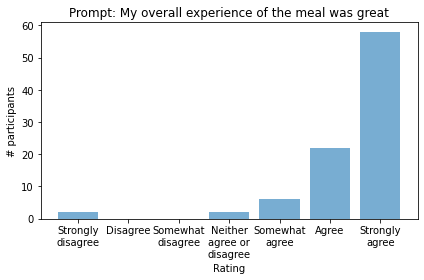

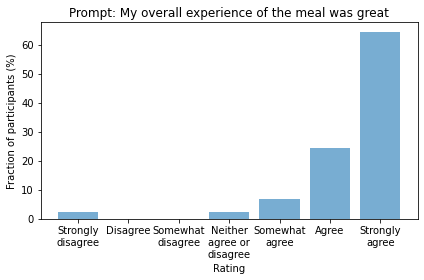

I liked the social interactions with the other participants very much:
	1  Strongly disagree: 2 (2.22%)
	2  Disagree: 0 (0.00%)
	3  Somewhat disagree: 0 (0.00%)
	4  Neither agree or disagree: 1 (1.11%)
	5  Somewhat agree: 3 (3.33%)
	6  Agree: 15 (16.67%)
	7  Strongly agree: 69 (76.67%)


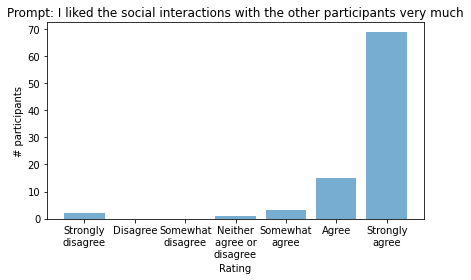

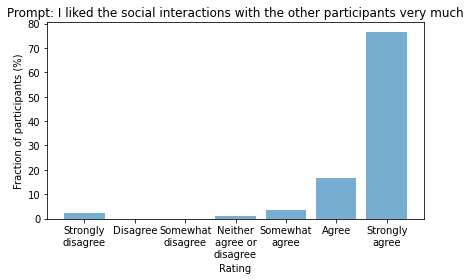

The food was excellent:
	1  Strongly disagree: 2 (2.22%)
	2  Disagree: 1 (1.11%)
	3  Somewhat disagree: 3 (3.33%)
	4  Neither agree or disagree: 6 (6.67%)
	5  Somewhat agree: 19 (21.11%)
	6  Agree: 25 (27.78%)
	7  Strongly agree: 34 (37.78%)


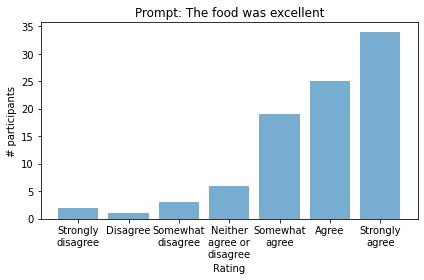

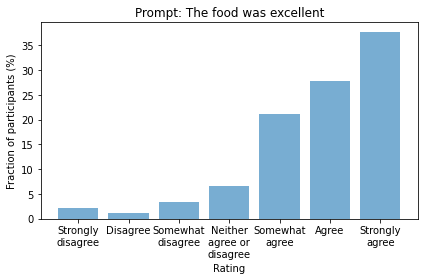

In [31]:
prompts = {
    'Q1_1': 'My overall experience of the meal was great',
    'Q1_2': 'I liked the social interactions with the other participants very much',
    'Q1_3': 'The food was excellent'
}
rating_labels = [
    '1  Strongly disagree',
    '2  Disagree',
    '3  Somewhat disagree',
    '4  Neither agree or disagree',
    '5  Somewhat agree',
    '6  Agree',
    '7  Strongly agree',
]
x_rating_labels = [
    'Strongly\ndisagree',
    'Disagree',
    'Somewhat\ndisagree',
    'Neither\nagree or\ndisagree',
    'Somewhat\nagree',
    'Agree',
    'Strongly\nagree',
]
print('Dining experience ratings:')
aggregated_counts = []
for prompt_key, prompt in prompts.items():
    ratings_counter = Counter(post_df[prompt_key][2:])
    ratings_counter.update({ rating_label: 0 for rating_label in rating_labels if rating_label not in ratings_counter })
    ratings_sorted = sorted(ratings_counter.items())
    print_item_counts(ratings_sorted, prompt)

    y_counts = [cnt for _, cnt in ratings_sorted]
    aggregated_counts.append(y_counts)
    plt.figure()
    plt.bar(x_rating_labels, y_counts, alpha=0.6)
    plt.xlabel('Rating')
    plt.ylabel('# participants')
    plt.title(f'Prompt: {prompt}')
    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.bar(x_rating_labels, np.array(y_counts) * 100 / 90, alpha=0.6)
    plt.xlabel('Rating')
    plt.ylabel('Fraction of participants (%)')
    plt.title(f'Prompt: {prompt}')
    plt.tight_layout()
    plt.show()


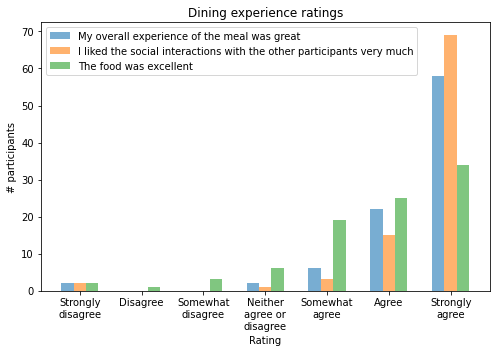

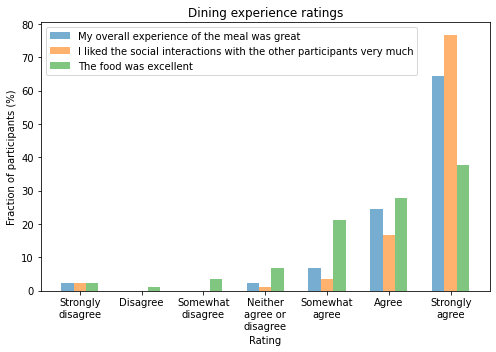

In [32]:
# All prompts in one plot
ratings_range = np.arange(1, 8)
plt.figure(figsize=(7,5))
for i, (prompt, y_counts) in enumerate(zip(prompts.values(), aggregated_counts)):
    plt.bar(ratings_range + 0.2 * (i - 1), y_counts, alpha=0.6, width=0.2, label=prompt)
plt.legend()
plt.xticks(ratings_range, x_rating_labels)
plt.xlabel('Rating')
plt.ylabel('# participants')
plt.title(f'Dining experience ratings')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
for i, (prompt, y_counts) in enumerate(zip(prompts.values(), aggregated_counts)):
    plt.bar(ratings_range + 0.2 * (i - 1), np.array(y_counts) * 100 / 90, alpha=0.6, width=0.2, label=prompt)
plt.legend()
plt.xticks(ratings_range, x_rating_labels)
plt.xlabel('Rating')
plt.ylabel('Fraction of participants (%)')
plt.title(f'Dining experience ratings')
plt.tight_layout()
plt.show()

### 2.1.1 Open-ended questions

In [33]:
open_questions = {
    'Q2': "Please list a few things that you liked about the meal experience you just had",
    'Q3': "Please list a few things that you didn't like about the meal experience you just had",
    'Q4': "When do you think it is appropriate to take a bite of food when you are eating with others? Please share your thoughts below."
}

for question_key, question in open_questions.items():
    print('=' * 150)
    print(question)
    print('=' * 150)
    responses_sorted = sorted([ (f'{session_id}_{participant_position}', response)  for session_id, participant_position, response in zip(post_df['I1'][2:], post_df['I2'][2:], post_df[question_key][2:]) ])
    for participant_id, response in responses_sorted:
        print(f'{participant_id}\t| {response}')


Please list a few things that you liked about the meal experience you just had
01_1	| Hanging out with my friends over lunch.
01_2	| Talking about random things, getting to spend time with friends, eating leisurely
01_3	| The food and conversation
02_1	| The variety of conversation
02_2	| It was super interactive and I got to know my friends better
02_3	| The food, the conversation
03_1	| It was relaxing and a nice destress from all the assignments and deadlines around this time
03_2	| Talking with my friends, planning things...
03_3	| '- good friends, and I was hungry so I wanted to eat
04_1	| Got some time to pause and spend with friends
04_2	| talk with my colleges
04_3	| Variety of conversation topics 
05_1	| The food was delicious and I am good friends with the other participants so the conversation was good.
05_2	| Friends, food tasted so good
05_3	| '- the food was very good and the company was excellent.
06_1	| I liked getting the chance to catch up with my friends and socializ